# Example Platypus reduction using `refnx`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from refnx.reduce import ReducePlatypus, reduce_stitch
from refnx.dataset import ReflectDataset, Data1D
%matplotlib inline

In [2]:
data_directory = '../refnx/reduce/test/'

This command reduces and stitches multiple files together. The
dataset is saved in the current working directory, if `save==True`. Use of `data_folder`
is not necessary if the data is in the current directory. The
first list is a list of the reflected beam files. The second is a
list of the direct beam run files.

In [3]:
dataset, fname = reduce_stitch([708, 709, 710],
                               [711, 711, 711],
                               data_folder=data_directory,
                               rebin_percent=3,
                               save=True)
print(fname)

c_PLP0000708.xml


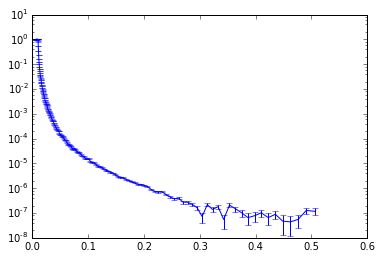

In [4]:
plt.errorbar(dataset.x, dataset.y, dataset.y_sd)
plt.yscale('log')

One can reduce files individually. A `ReducePlatypus` object is created with the direct beam run.  You need to create different `ReducePlatypus` objects for each direct beam used.

In [5]:
reducer = ReducePlatypus('PLP0000711.nx.hdf', data_folder=data_directory)

In [6]:
reduced_data = reducer.reduce('PLP0000708.nx.hdf', rebin_percent=3, save=True)
# alternatively
reduced_data = reducer('PLP0000708.nx.hdf', rebin_percent=3, save=True)

`reduced_data` is a dict which contains all the reduced data. Additionally, the files are saved if you use the `save=True` keyword. You can get the filenames from `reduced_data['fname']`

In [7]:
print(reduced_data['fname'])

['PLP0000708_0.dat']


The following items are present in `reduced_data`.

In [8]:
reduced_data.keys()

dict_keys(['qy', 'm_ref_sd', 'datafile_number', 'ydata_sd', 'nspectra', 'ydata', 'xdata_sd', 'qz', 'fname', 'xdata', 'm_ref'])

`nspectra` is the number of detector images, N.

`m_ref` is the 2D offspecular map. `m_ref.shape=(N, T, Y)`. `T` and `Y` are the number of wavelength and y-bins (2theta) respectively.

`qz` and `qy` are the corresponding Q values for `m_ref`.

## Event mode reduction
If you wish to reduce event mode data use the following:

In [9]:
reduce_event = ReducePlatypus('PLP0011613.nx.hdf',
                               data_folder=data_directory)

Now use the ReducePlatypus object to reduce eventmode data. `eventmode` specifies the timebins for the event mode.

In [10]:
reduced_event = reduce_event('PLP0011641.nx.hdf',
                             rebin_percent=2,
                             eventmode=[0, 900, 1800])

In [11]:
reduced_event.keys()

dict_keys(['qy', 'm_ref_sd', 'datafile_number', 'ydata_sd', 'nspectra', 'ydata', 'xdata_sd', 'qz', 'fname', 'xdata', 'm_ref'])

There are now two specular reflectivity curves produced, because there were two time bins specified.

In [12]:
reduced_event['ydata'].shape, reduced_event['xdata'].shape

((2, 97), (2, 97))

The data is saved in:

In [13]:
reduced_event['fname']

['PLP0011641_0.dat', 'PLP0011641_1.dat']